# Homework #7
# CP 9.2, 9.3, 9.4, 9.5a,b, 9.9a,b
Newton Kwan
<br>
Professor Walter
<br>
PHY 566
<br>
2 April 2018 

In [153]:
from numpy import sin, linspace, loadtxt, array, zeros, arange, copy, empty
from math import pi, floor, exp, cos, sin, sqrt
from pylab import legend, xlabel, ylabel, title, imshow, plot, jet, gray, show, axis
from scipy import signal
from dcst import dst, idst
import matplotlib
%precision %g
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['savefig.dpi'] = 120
matplotlib.rcParams['figure.dpi'] = 120
from time import time

### 9.2 Speeding up the relaxation method

We use the overrelaxation / Gauss-Seidal method to solve Laplace's equation for the two dimensional problem in Example 9.1 -- a square box 1m on each side, at voltage V = 1 volt along the top wall and zero volts along the other three. We use a grid of spacing $a$ = 1cm, so that there are 100 grid points along each wall, or 101 if you count the points at both ends. 

We continue the iteration of the method until the value of the electric potential changes by no more than $\delta$ = $10^-6$V at any grid point on any step, then make a density plot of the final solution, similar to that shown in 9.3. 

We experiment with different values of $\omega$ to find which value gives the fastest solution. 

(hints: a value of 0.9 does well. In general, large values cause the calculation to run faster, but if you choose a value the speed drops off and for values above 1 the calcuation becomes unstable) 

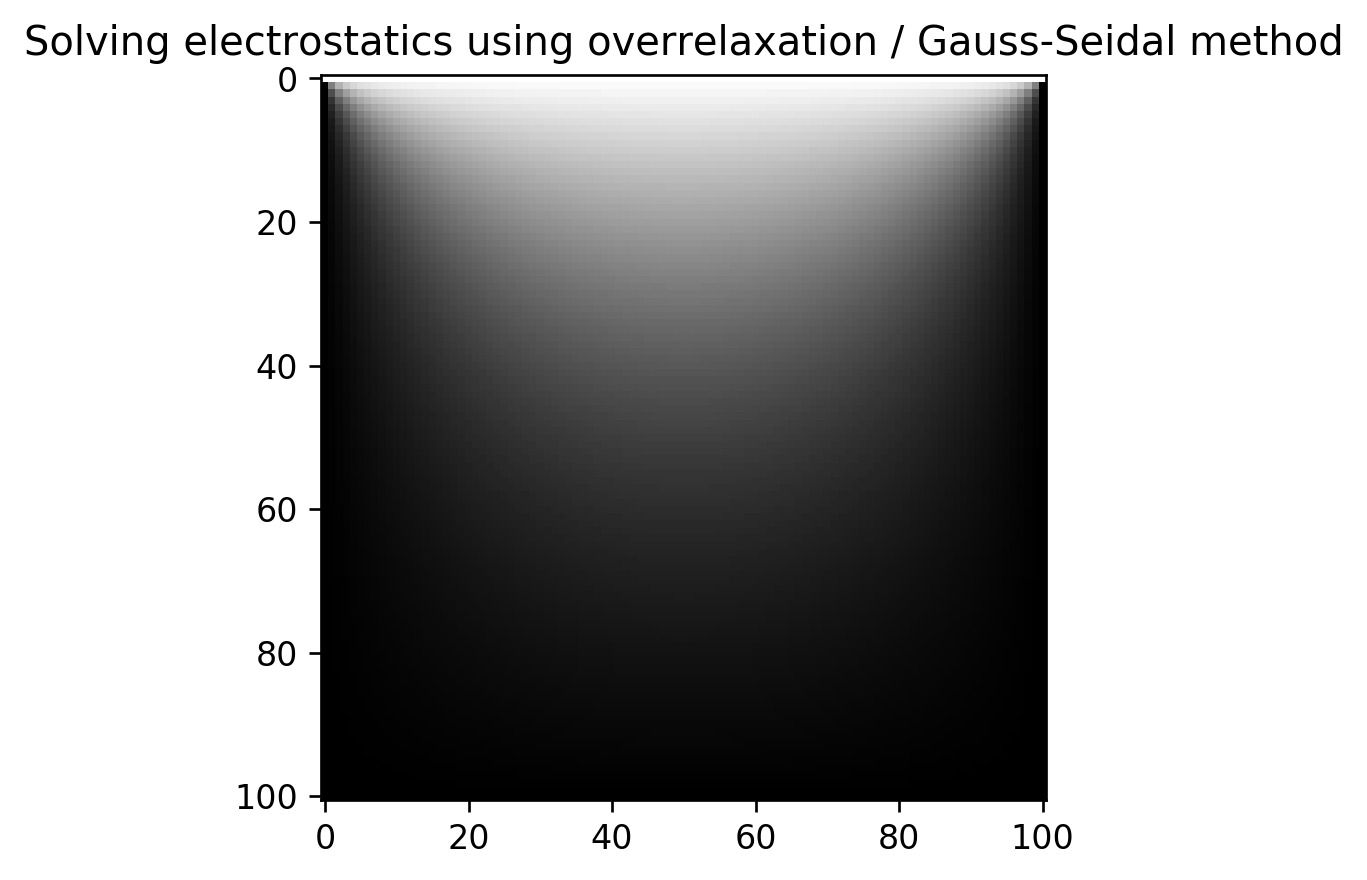

Time taken 12.788409233093262 seconds


In [138]:
'''
computes the solution of a two dimensional
electrostatic problem using the Jacobi method
and makes a density plot 
'''

from numpy import empty,zeros,max
from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-6   # Target accuracy
w = 0.9         # omega 

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = V

# Main loop
delta = 1.0
timestart = time()
while delta>target:
    
    # Calculate new values of the potential
    delta = 0.0 
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                continue 
            else:
                temp = phi[i,j]
                phi[i,j] = (1 + w)*(phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4 \
                                - w*phi[i,j]
                difference = abs(temp - phi[i,j])
                if difference > delta: 
                    delta = difference 
                
timeend = time()
totaltime = timeend - timestart 
# Make a plot
title("Solving electrostatics using overrelaxation / Gauss-Seidal method")
imshow(phi)
gray()
show()
print("Time taken", totaltime, "seconds")

### 9.3 Solving Poisson’s equation.

We consider the following simple model of an electronic capacitor, consisting of two flat metal plates enclosed in a square metal box. 

See book for full picture

For simplicity we model the system in two dimensions. We use [insert method here] to write a program to calculate the electrostatic potential in the box on a grid of 100 x 100 points, where the walls of the box are at voltage zero and the two plates (which are of negligible thickness) are at voltages $\pm 1V$ as shown. 

We calculate the value of the potential at each grid point to a precision of $10^-6$ volts and then make a density plot of the result. 

Hint: Notice that the capacitor plate are at fixed voltage, not fixed charge, so this problem differs from the problem with the two charges in Exercise 9.1 In effect, the capacitor plates are part of the boundary condition in this case: they behave the same way as the walls of the box, with potentials that are fixed at a certain value and cannot change. 

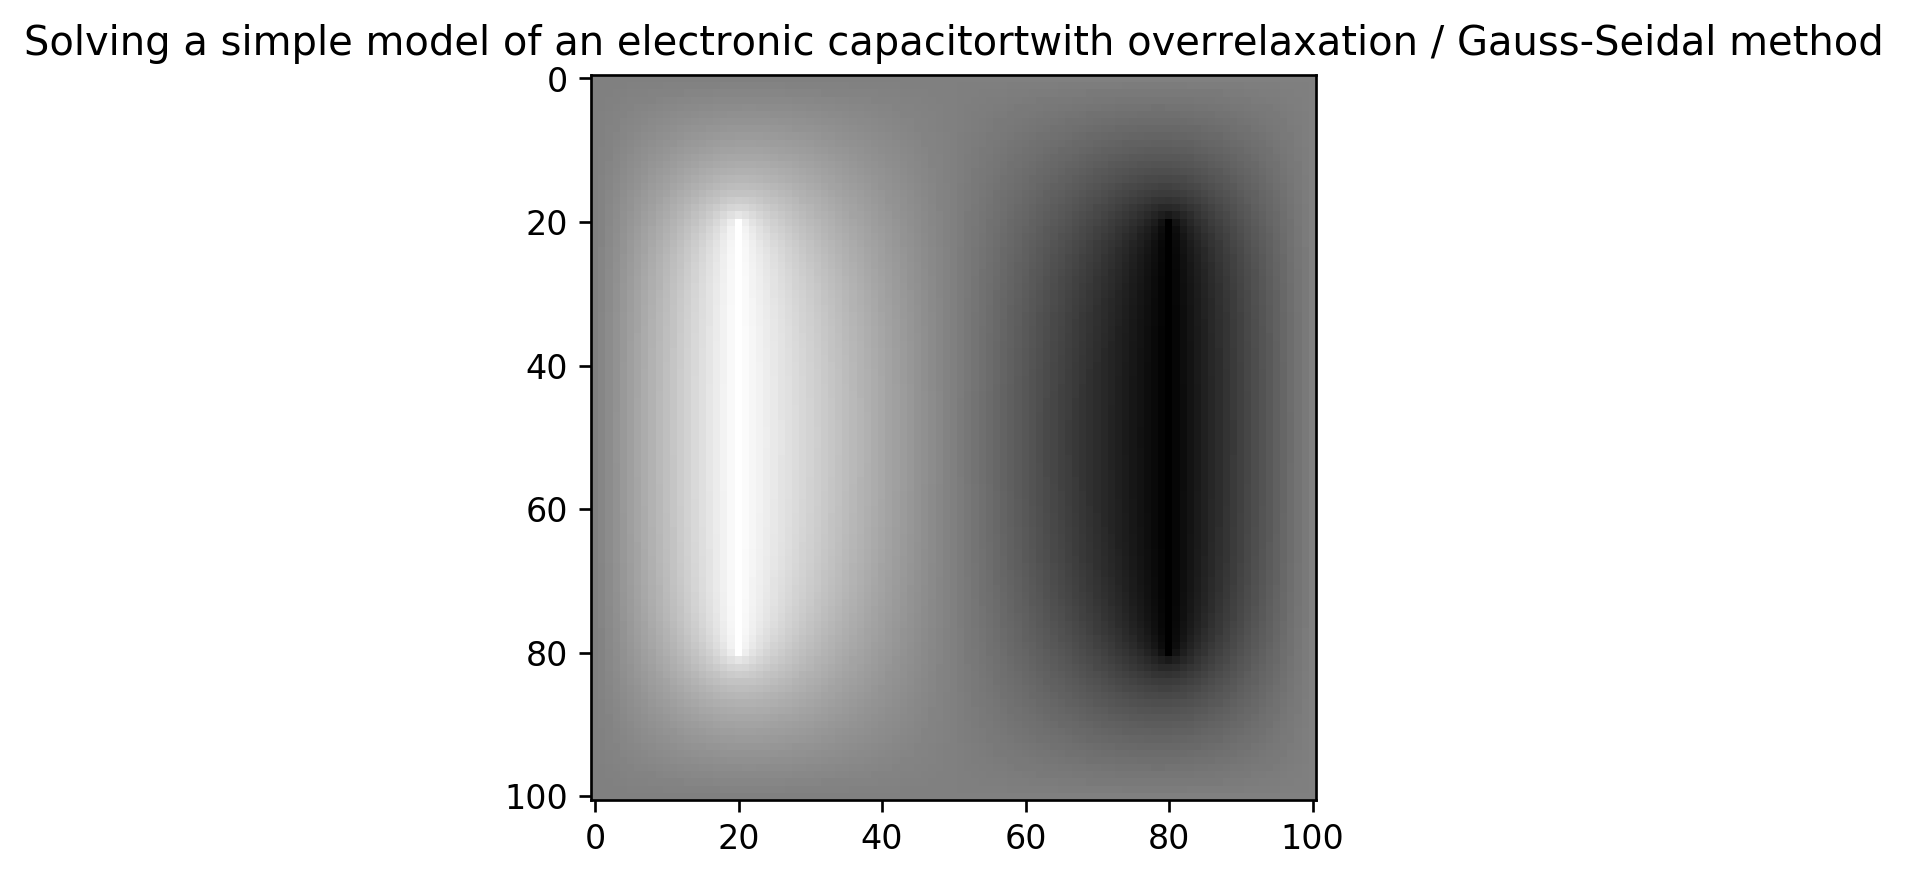

Time taken 8.066273927688599 seconds


In [155]:
'''
computes the solution of a two dimensional
electrostatic problem using the Jacobi method
and makes a density plot 
'''

from numpy import empty,zeros,max
from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 1           # Voltage of inner plates 
target = 1e-6   # Target accuracy
w = 0.9         # omega 

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = 0      #top wall
phi[:,0] = 0      #left wall 
phi[M,:] = 0    #bottom wall 
phi[:,M] = 0    #right wall 
phi[20:81,20] = 1   #left positive plate 
phi[20:81,80] = -1  #right negative plate 

#phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
timestart = time()
while delta>target:
    
    # Calculate new values of the potential
    delta = 0.0 
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M or (20<=i<=80 and j == 20)\
            or (20<=i<=80 and j == 80):
                continue 
            else:
                temp = phi[i,j]
                phi[i,j] = (1 + w)*(phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4 \
                                - w*phi[i,j]
                difference = abs(temp - phi[i,j])
                if difference > delta: 
                    delta = difference 
                
timeend = time()
totaltime = timeend - timestart 
# Make a plot
title("Solving a simple model of an electronic capacitort" 
      "with overrelaxation / Gauss-Seidal method")
imshow(phi)
gray()
show()
print("Time taken", totaltime, "seconds")

### 9.4 Flow of heat in the Earth’s crust.

A classic example of a diffusion problem with a time-varying boundary condition is the diffusion of heat into the crust of the Earth, as surface temperature varies with the seasons. Suppose the mean daily temperature at a particular point on the surface varies as:

$$ T_0(t) = A + Bsin\frac{2\pi t}{\tau}, $$ 

where $\tau = 365$ days, $A = 10^\circ C$, and $B = 12^\circ C$

At a depth of 20m below the surface almost all annual temperature variation is ironed out and temperature is, to a good approximation, a constant $11^\circ C$ (which is higher than the mean surface temperature of $10^\circ C$ -- temperature increases with depth, due to heating from the hot core of the planet). The thermal diffusivity of the Earth's crust varies somewhat from place to place, but for our purposes we will treat it as constant with value $D$ = 0.1 $m^2$ $day^-1$. 

We write a program (or modify a program) to calculate the temperature profile of the crust as function of depth up to 20m and time up to 10 years. We start with tempearture everywhere equal to $10^\circ C$, except at the surace and the deepest point, choose values for the number of grid points and the time-step $h$, then run our program for the first nine simulated years, to allow it to settle down into whatever pattern it reaches. Then for the tenth and final year, we plot four temperature profiles taken at 3-month intervals on a single graph to illustrate how the temperature changes as a function of depth and time. 

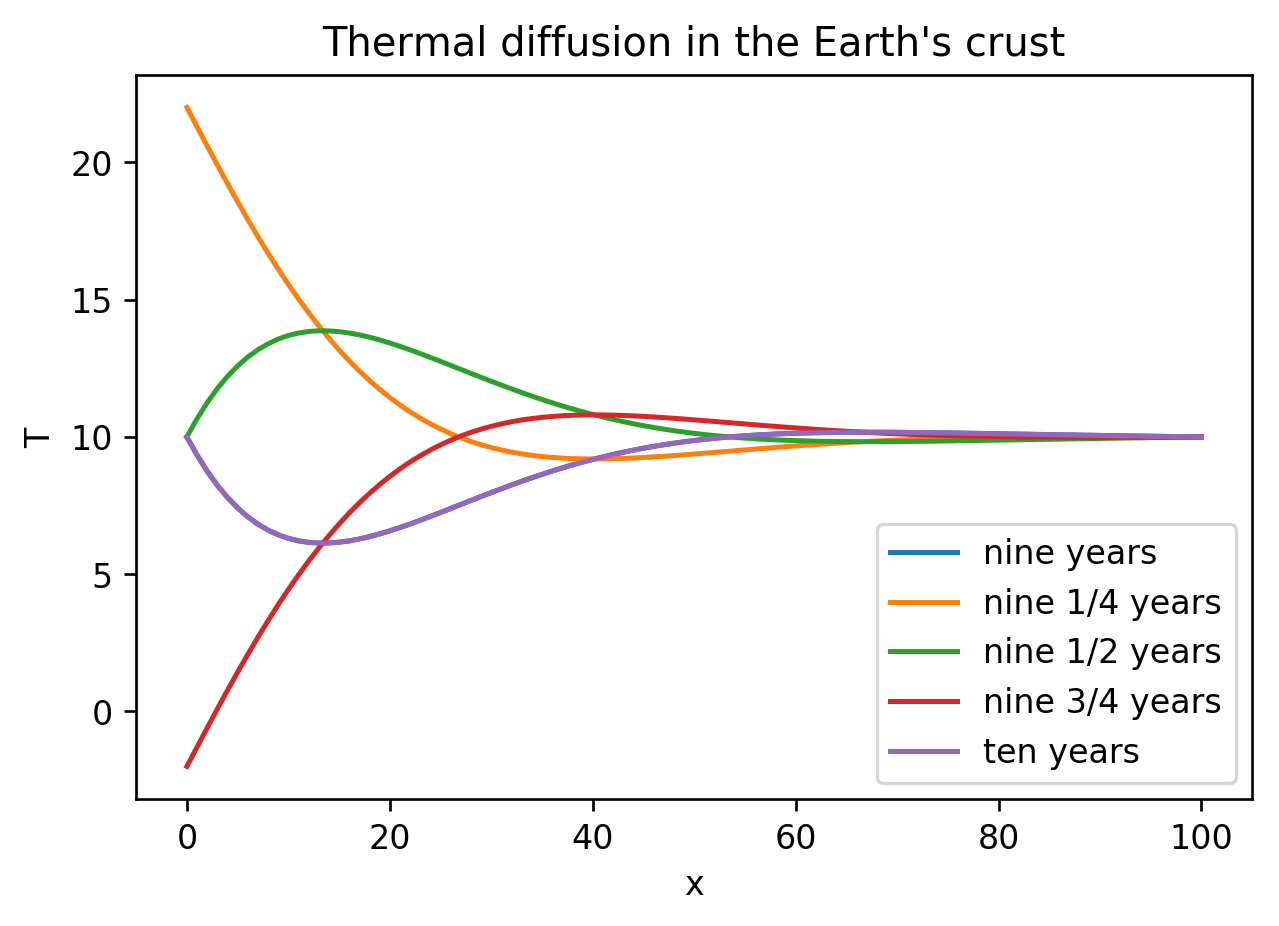

In [140]:
# Constants
L = 20.0      # Thickness of Earth's surface in meters
D = 0.1       # Thermal diffusivity in m^2 day^-1 
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-2      # Time-step
tau = 365     # one year in days 
A = 10        # temp in celsius
B = 12        # temp in celsius 
epsilon = h/1000

def surfaceT(t): 
    return A + B*sin(2*pi*t/tau) 
    
Tsurf = 10.0    # Low temperature in Celcius
Tearth = 10.0   # Intermediate temperature in Celcius
Tbottom = 11.0  # Hi temperature in Celcius

t9 = 9*tau
t91 = 9.25*tau
t92 = 9.5*tau 
t93 = 9.75*tau
t10 = 10*tau
tend = t10 + epsilon

# Create arrays
T = empty(N+1,float)
T[0] = Tbottom
T[N] = A
T[1:N] = Tearth
Tp = empty(N+1,float)
Tp[0] = Tbottom
Tp[N] = A 


# Main loop
t = 0.0
c = h*D/(a*a)
while t<tend:

    # Calculate the new values of T
    T[0] = surfaceT(t)
    '''
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    '''
    Tp[1:N] = T[1:N] + c*(T[0:N-1] + T[2:N+1] -2*T[1:N])
    T,Tp = Tp,T
    t += h

    # Make plots at the given times
    if abs(t-t9)<epsilon:
        plot(T, label = "nine years")
    if abs(t-t91)<epsilon:
        plot(T, label = "nine 1/4 years")
    if abs(t-t92)<epsilon:
        plot(T, label = "nine 1/2 years")
    if abs(t-t93)<epsilon:
        plot(T, label = "nine 3/4 years")
    if abs(t-t10)<epsilon:
        plot(T, label = "ten years")
    
   
title("Thermal diffusion in the Earth's crust")
xlabel("x")
ylabel("T")
legend(loc = "lower right")
show()

### 9.5: FTCS (Forward-time centered-space) Solution of the wave equation 

### a) Instead of making a movie like in part b) make three snapshot figures at 2 ms, 50 ms, and 100 ms. Basically, you should reproduce the plots in Figure 9.7 in the book on page 427.

Consider a piano string of length $L$, initally at rest. At time $t = 0$ the string is struck by the piano hammer a distance $d$ from the end of the string (See diagram in book page 431) 

The string vibrates as a result of being struck, except at the ends, $x = 0$ and $x = L$, where it is held fixed 

#### 9.5.a

We write a program that uses the FTCS method to solve the complete set of simultaneous first-order equations:

$$ \frac{d\phi}{dt} = \psi(x,t), \qquad \frac{d\psi}{dt} = \frac{v^2}{a^2}[\phi(x + a,t) + \phi(x - a,t) - 2\phi(x,t)]$$

where $v = 100ms^-1$, with the initial condition that $\phi(x) = 0$ everywhere but the velocity $\psi(x)$ is nonzero, with profile 

$$ \psi(x) = C \frac{x(L - x)}{L^2}exp[-\frac{(x-d)^2}{2\sigma ^2}], $$ 

where $L = 1m$, $d = 10cm$, $C = 1ms^-1$, and $\sigma = 0.3m$. We choose a value for the time-step $h = 10^{-6}$s. In addition, we will make a three snapshot figures at 2 ms, 50 ms, and 100 ms, reproducing the plots in Figure 9.7 in the book on page 427.

In [141]:
# Constants
L = 1.0       # Length on string 
C = 1.0       # ms^-1 
d = 0.1       # Hammer distance from 0 
N = 100       # Number of divisions in grid
sigma = 0.3   # sigma value in meters 
a = L/N       # Grid spacing
v = 100.0     # Initial velocity 
h = 1e-6      # Time-step
epsilon = h/1000
    
def initialpsi(x):
    return (C*x*(L-x)/(L**2))*exp((-(x-d)**2)/(2*sigma**2))

phibeg = 0.0               # Beginning fixed point 
phimiddle = 0.0            # Initial x 
phiend = 0.0               # End fixed point
psibeg = 0.0               # Initial v at beg
psiend = 0.0               # Initial v at end 

t2 = 2e-3     #string at 2ms 
t50 = 50e-3   #string at 50ms
t100 = 100e-3 #string at 100ms
tend = t100 + epsilon

# Create arrays
phi = empty(N+1,float)
phi[0] = phibeg
phi[N] = phiend
phi[1:N] = phimiddle
phip = empty(N+1,float)
phip[0] = phibeg
phip[N] = phiend

psi = empty(N+1,float)
psi[0] = psibeg
psi[N] = psiend
for i in range(1,N):
    psi[i] = initialpsi(i*a)
psip = empty(N+1,float)
psip[0] = psibeg
psip[N] = psiend

# Main loop
t = 0.0
D = h*v**2 / (a*a)
timestart = time()
while t<tend:

    # Calculate the new values of T
    '''
    for i in range(1,N):
        phip[i] = phi[i] + h*psi[i]
        psip[i] = psi[i] + D*(phi[i+1]+phi[i-1]-2*phi[i])
    '''  
    phip[1:N] = phi[1:N] + h*psi[1:N]
    psip[1:N] = psi[1:N] + D*(phi[0:N-1] + phi[2:N+1] -2*phi[1:N])
    phi= copy(phip)
    psi= copy(psip)
    #phi,phip = phip,phi
    #psi,psip = psip,psi
    t += h

    # Make plots at the given times
    if abs(t-t2)<epsilon:
        t2array = copy(phi)
        #plot(phi, label = "2 ms")
    if abs(t-t50)<epsilon:
        t50array = copy(phi)
        #plot(phi, label = "50 ms")
    if abs(t-t100)<epsilon:
        t100array = copy(phi)
        #plot(phi, label = "100 ms")

        
timeend = time()
totaltime = timeend - timestart 
    
#title("Vibration of a string using FTCS ")
#xlabel("x")
#ylabel("phi")
#legend(loc = "lower right")
#show()
print("Time taken:", totaltime, "seconds")

Time taken: 1.1316008567810059 seconds


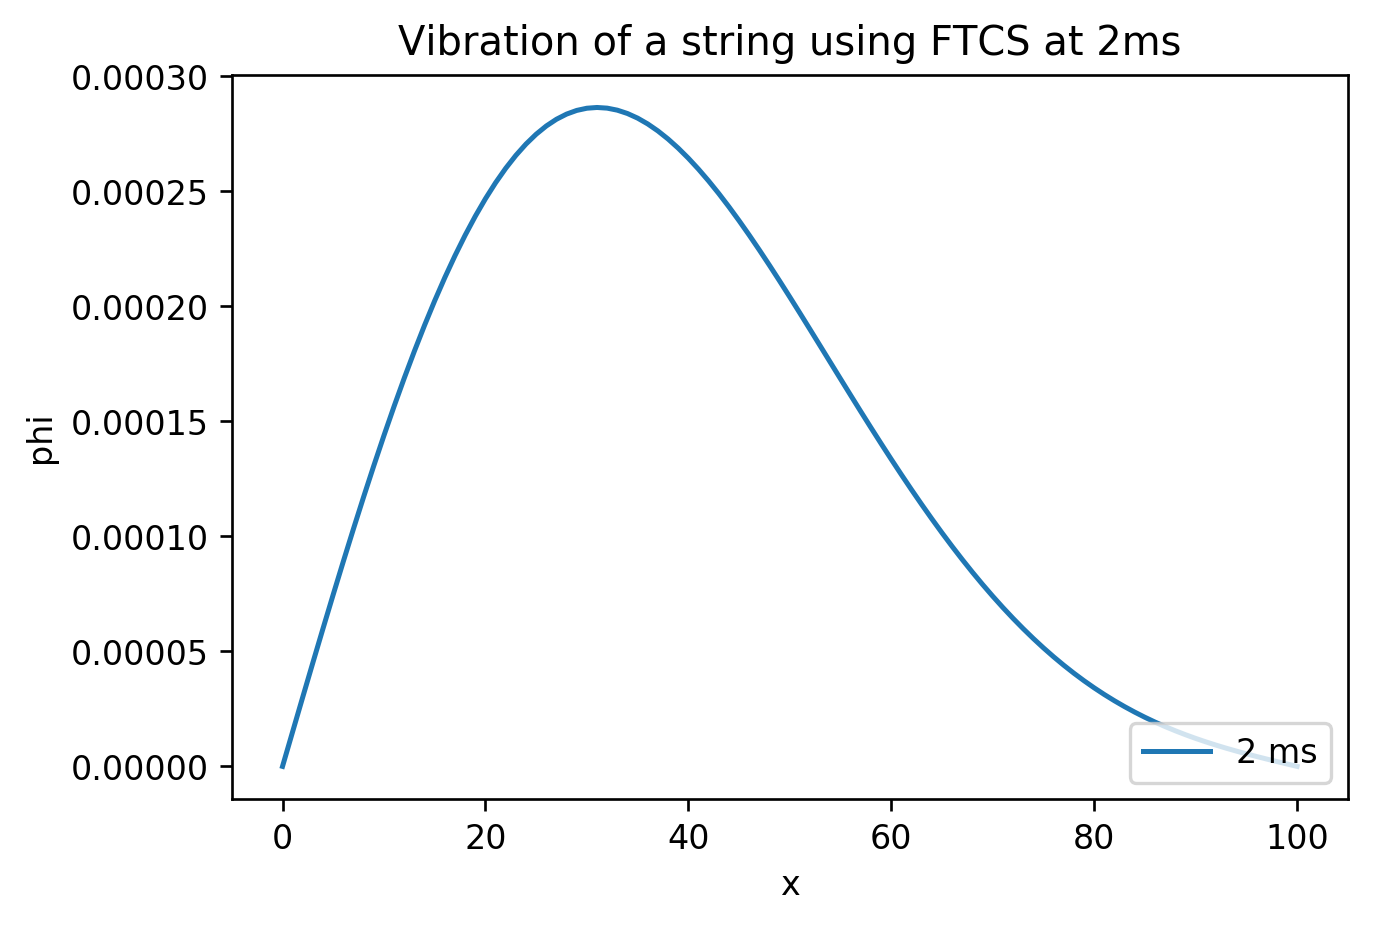

In [142]:
plot(t2array, label = "2 ms")
title("Vibration of a string using FTCS at 2ms")
xlabel("x")
ylabel("phi")
legend(loc = "lower right")
show()

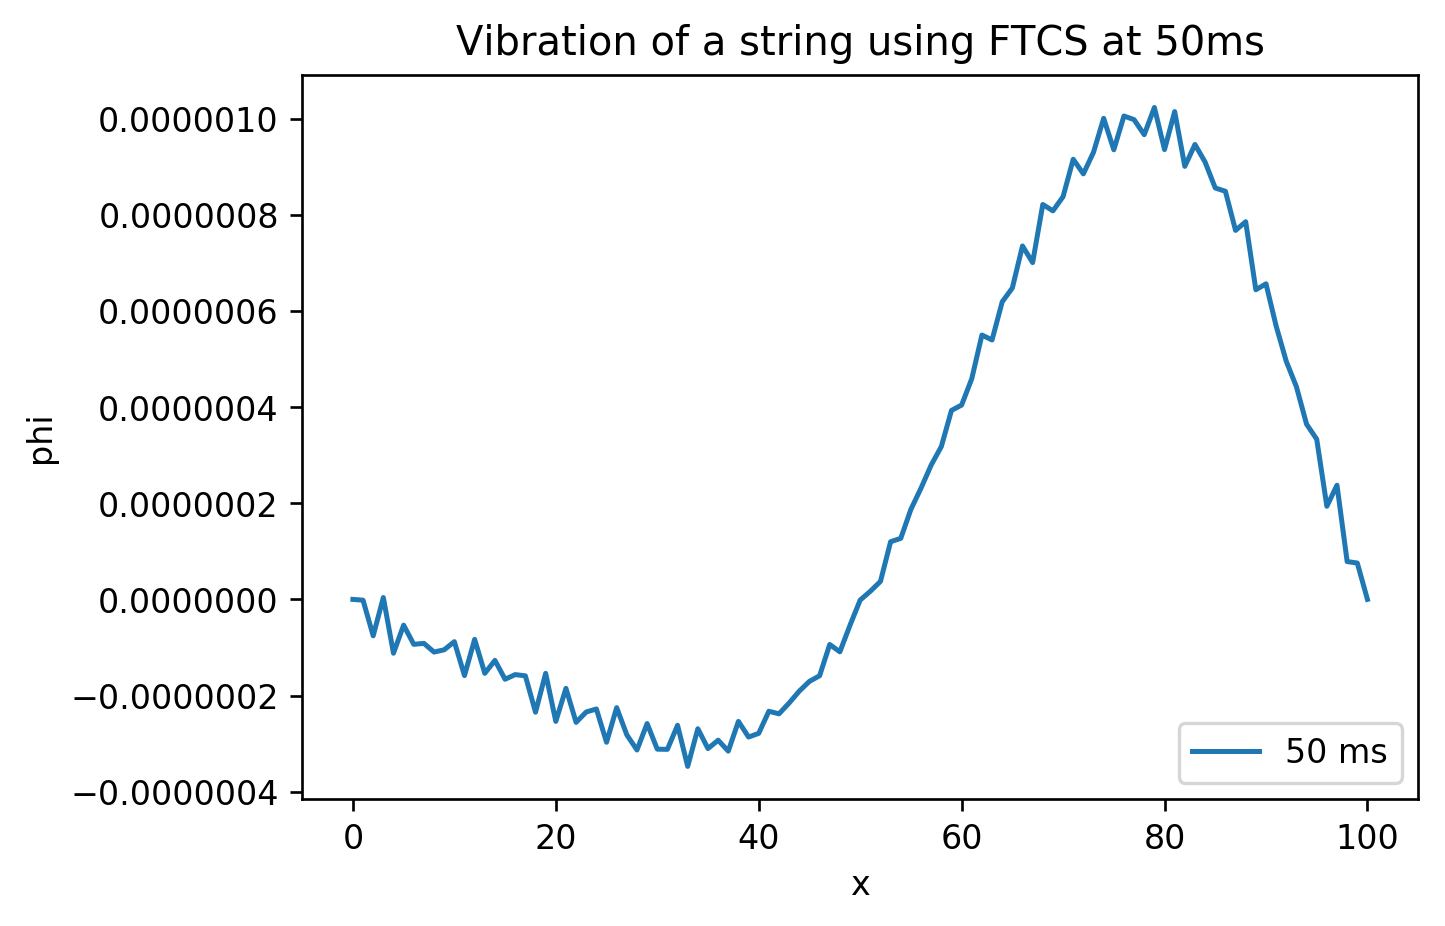

In [143]:
plot(t50array, label = "50 ms")
title("Vibration of a string using FTCS at 50ms")
xlabel("x")
ylabel("phi")
legend(loc = "lower right")
show()

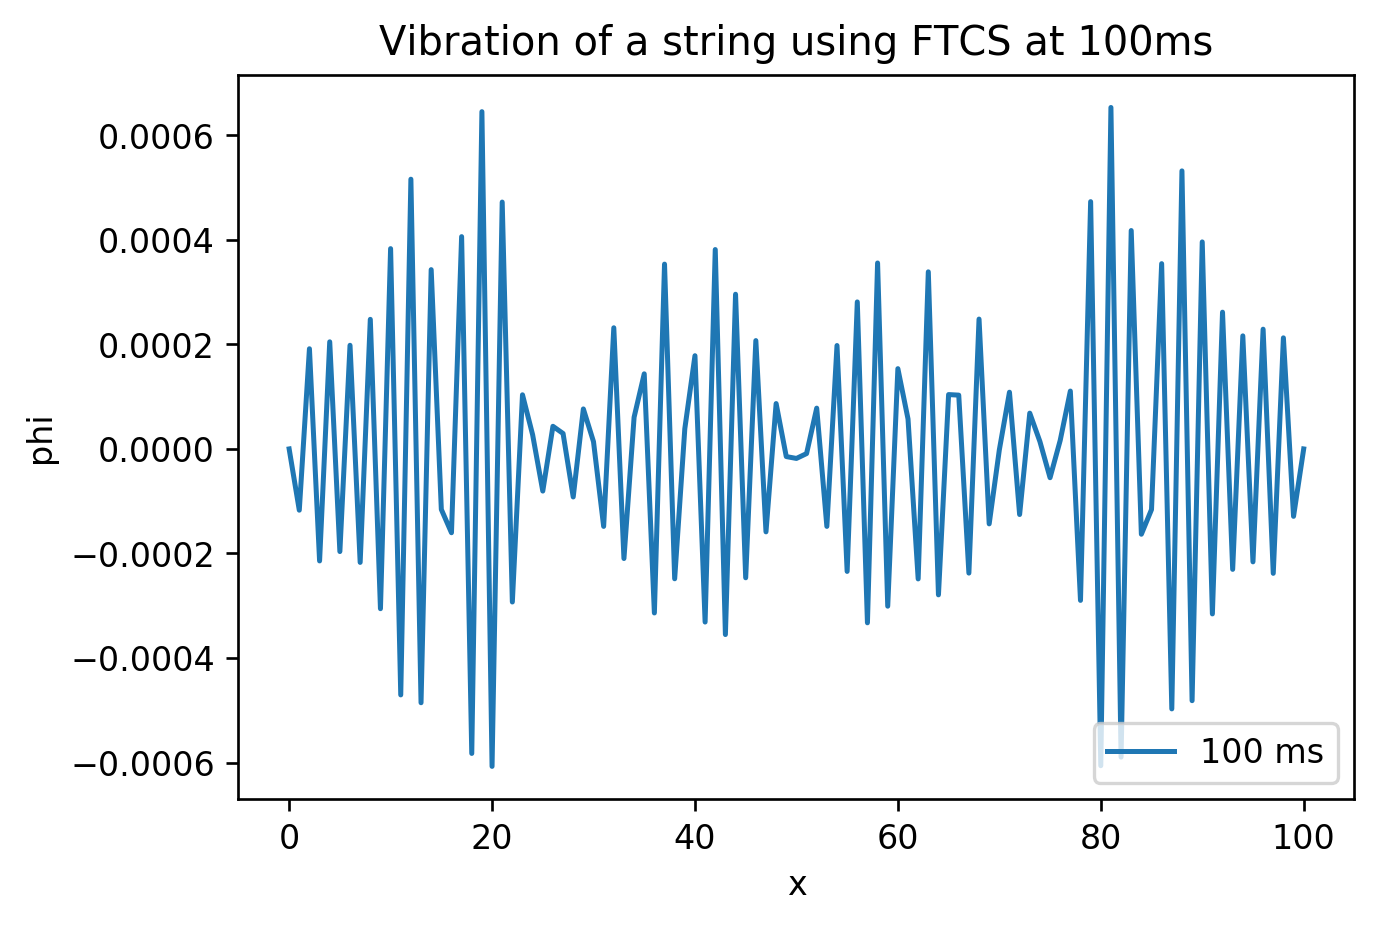

In [144]:
plot(t100array, label = "100 ms")
title("Vibration of a string using FTCS at 100ms")
xlabel("x")
ylabel("phi")
legend(loc = "lower right")
show()

### 9.9a, b: The Schrodinger equation and the spectral method 
### You could also make some snapshots graphs at later times to understand what happens to the particle.

This exercise uses the spectral method to solve the time-dependent Schrodinger equation 

$$-\frac{\hbar^2}{2M} \frac{\partial^2\psi}{\partial x^2} = i\hbar \frac{\partial\psi}{\partial t}$$

for the same system as Exericse 9.8, a single particle in one dimension in a box of length L with impenetrable walls. The wavefunction in such a box necessarily goes to zero on the walls and hence one possible (unnormalized) solution of the equation is 

$$\psi_{k}(x,t) = sin(\frac{\pi k x}{L})e^{iEt /\hbar},$$

where the energy $E$ can be found by subsituting into the Schrodinger equation, giving 

$$ E = \frac{\pi^2\hbar^2 k^2}{2ML^2}$$

As with a vibrating string of Section 9.3.4, we ca write a full solution as a linear combination of such individual solutions, which on the grid points $x_n = \frac{nL}{ N}$ takes the value 

$$ \psi(x_n, t) = \frac{1}{N} \sum_{k=1}^{N-1}b_k sin(\frac{\pi k n }{N})exp(i\frac{\pi^2\hbar k^2}{2ML^2}t), $$

where the $b_k$ are some set of (possibly complex) coefficients that specify the exact shape of the wavefunction and the leading factor of $\frac{1}{N}$ is optional but convenient. 


Since the Schrodinger equation (unlike the wave equation) is first order in time, we need only a single initial condition on the value of $\psi(x,t)$ to specify the coefficients $b_k$, although, since the coefficients are in general complex, we will need to calculate both real and imaginary parts of each coefficient. 

As in exercise 9.8, we consider an electron (mass $M$ $9.109 x 10^{-31}$) in a box of length $L = 10^{-8m}$. At time $t=0$ the wavefunction of the electron has the form

$$\psi(x,0) = exp[-\frac{(x-x_0)^2}{2\sigma^2}]e^{i\kappa x}, $$

where $x_0 = \frac{L}{2}$, $\sigma = 1 x 10^{-10}m$, $\kappa = 5 x 10^{10} m^-1$, and $\psi = 0$ on the walls at $x = 0$ and $x =L$



#### 9.9.a

We write a program to calculate the values of the coefficients of $b_k$, which for convenience can be broken down into their real and imaginary parts as $b_k = \alpha_k + i\eta_k$. We divide the box into $N = 1000$ slices and create two arrays containing th real and imaginary parts of $\psi(x_n,0)$ at each grid point. We perform discrete sine transforms on each array separately and hence calculate the values of the $\alpha_k$ and $\eta_k$ for all k = 1....N-1. To do this, we perform the discrete sine transforms, you can use the fast transform function $dst$ from the package $dcst$. The function takes an array of N real numbers and returns the discrete sine transform as another array of $N$ numbers. 

In [145]:
# Define constants 

L = 1e-8         # Length of box in meters 
M = 9.109e-31    # Mass of electron in kg 
N = 1000         # Divide box into 1000 points 
a = L/N          # Spacing between points 
hbar = 1.055e-34 # hbar 

# initial wavefunction 
def psi0(x):
    '''
    wavefunction of the electron at t = 0
    '''
    x0 = L/2     # initial x
    sig = 1e-10    # meters 
    kap = 5e10     # 1 / meters 
    re = exp(-((x-x0)**2) / (2*sig**2))*cos(kap*x)
    imag = exp(-((x-x0)**2) / (2*sig**2))*sin(kap*x)
    return re, imag 

# Initialize real and imag arrays 
realpart = empty(N+1, float)
imagpart = empty(N+1, float)

# Fill arrays with real or imaginary values 
for i in range(0, N+1): 
    realpart[i], imagpart[i] = psi0(i*a)
    #realpart[i] = psi0(i*a).real 
    #imagpart[i] = psi0(i*a).imag 
    
# Calculate discrete sine transform on each array 
alphaks = dst(realpart)       # a  values from k = 1 to N+1 
etaks = dst(imagpart)        # eta values from k = 1 to N+1 

#### 9.9.b 

Putting $b_k = \alpha_k + i\eta_k$ in the solution above and taking the real part we get 

$$Re \psi(x_n, t) = \frac{1}{N}\sum_{k=1}{N-1}[\alpha_k cos(\frac{\pi^2 \hbar k^2}{2ML^2}t) - \eta_k sin(\frac{\pi^2 \hbar k^2}{2ML^2}t)] sin(\frac{\pi k n}{N})$$

for the real part of the wavefunction. This is an inverse sine transform with coefficients equal to the quantities in the square brackets. 

We extend our program to calculate the real part of the wavefunction $\psi (x,t)$ at an arbitrary time $t$ using this formula and the inverse discrete sine transform function $idst$, also from the pacakge $dcst$. We est our program by making a graph of the wavefunction at time $ t = 10^{-16}s$

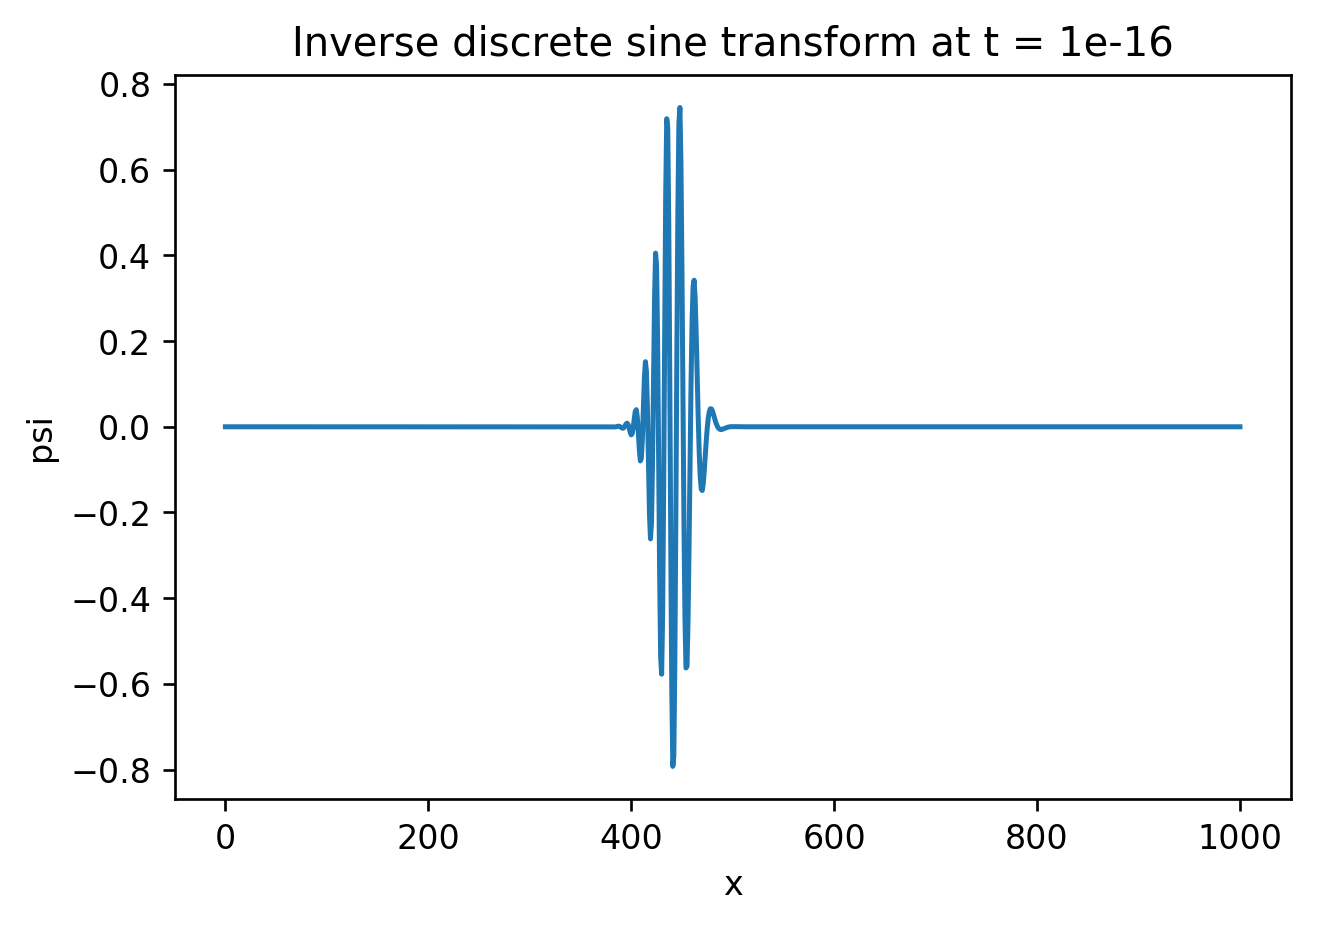

In [146]:
def realpsicoeffs(t):
    ''' 
    calculates real part of the wavefunction 
    and returns the inverse discrete sine transform
    of the real part 
    '''
    realpart = empty(N+1, float)
    for i in range(0, N+1): 
        realpart[i] = alphaks[i]*cos(((pi**2*hbar*i**2)/(2*M*L**2))*t)  \
                             - etaks[i]*sin(((pi**2*hbar*i**2)/(2*M*L**2))*t)
    inversed = idst(realpart)
    return inversed

t1 = 1e-16  # seconds 

plot(realpsicoeffs(t1), label = "Real part wavefunction")
    
xlabel("x")
ylabel("psi")
title("Inverse discrete sine transform at t = 1e-16")
show()

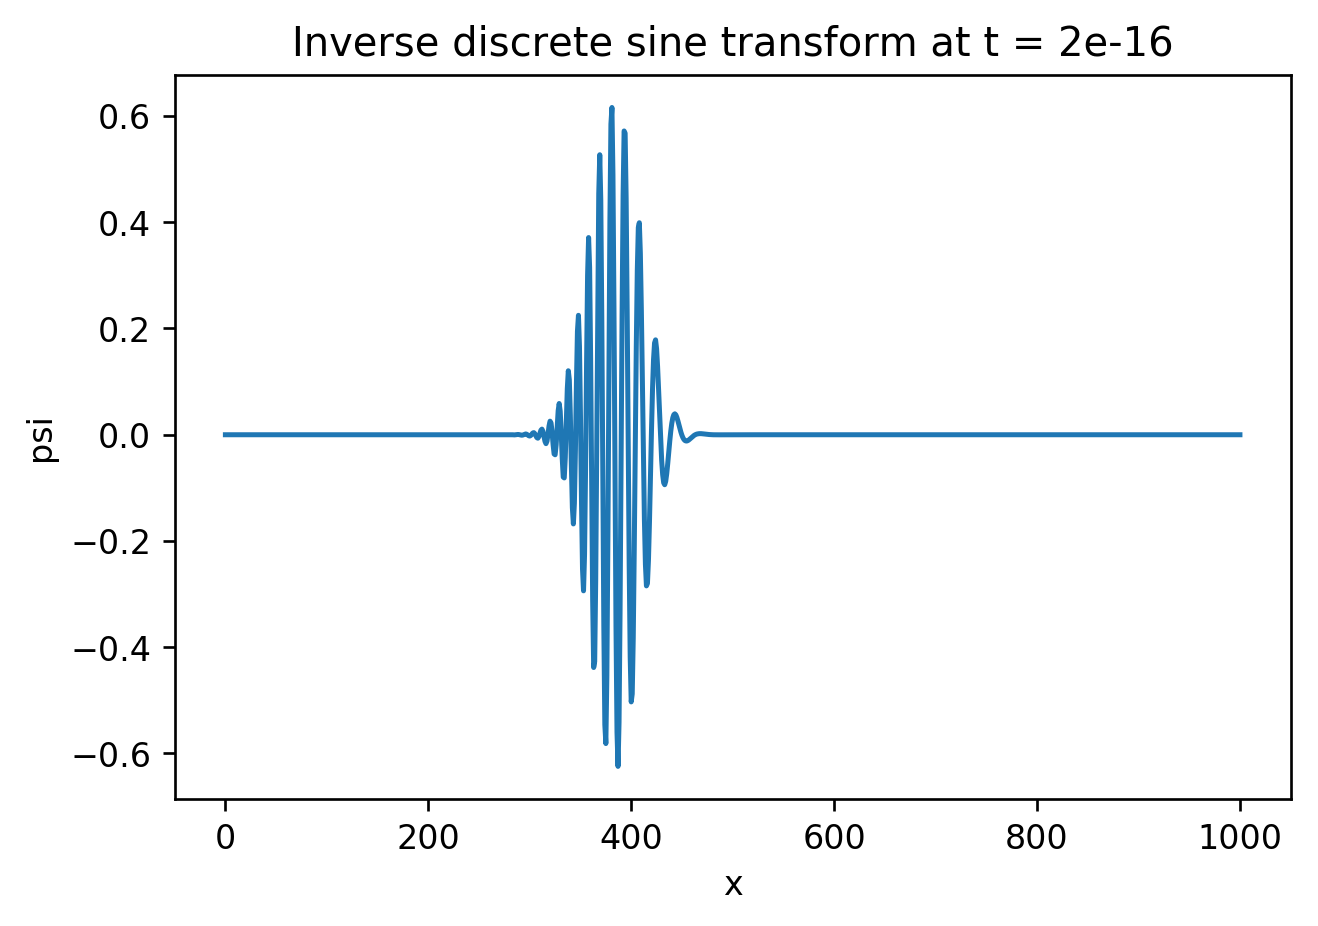

In [147]:
t2 = 2e-16  # seconds 

plot(realpsicoeffs(t2), label = "Real part wavefunction")
    
xlabel("x")
ylabel("psi")
title("Inverse discrete sine transform at t = 2e-16")
show()

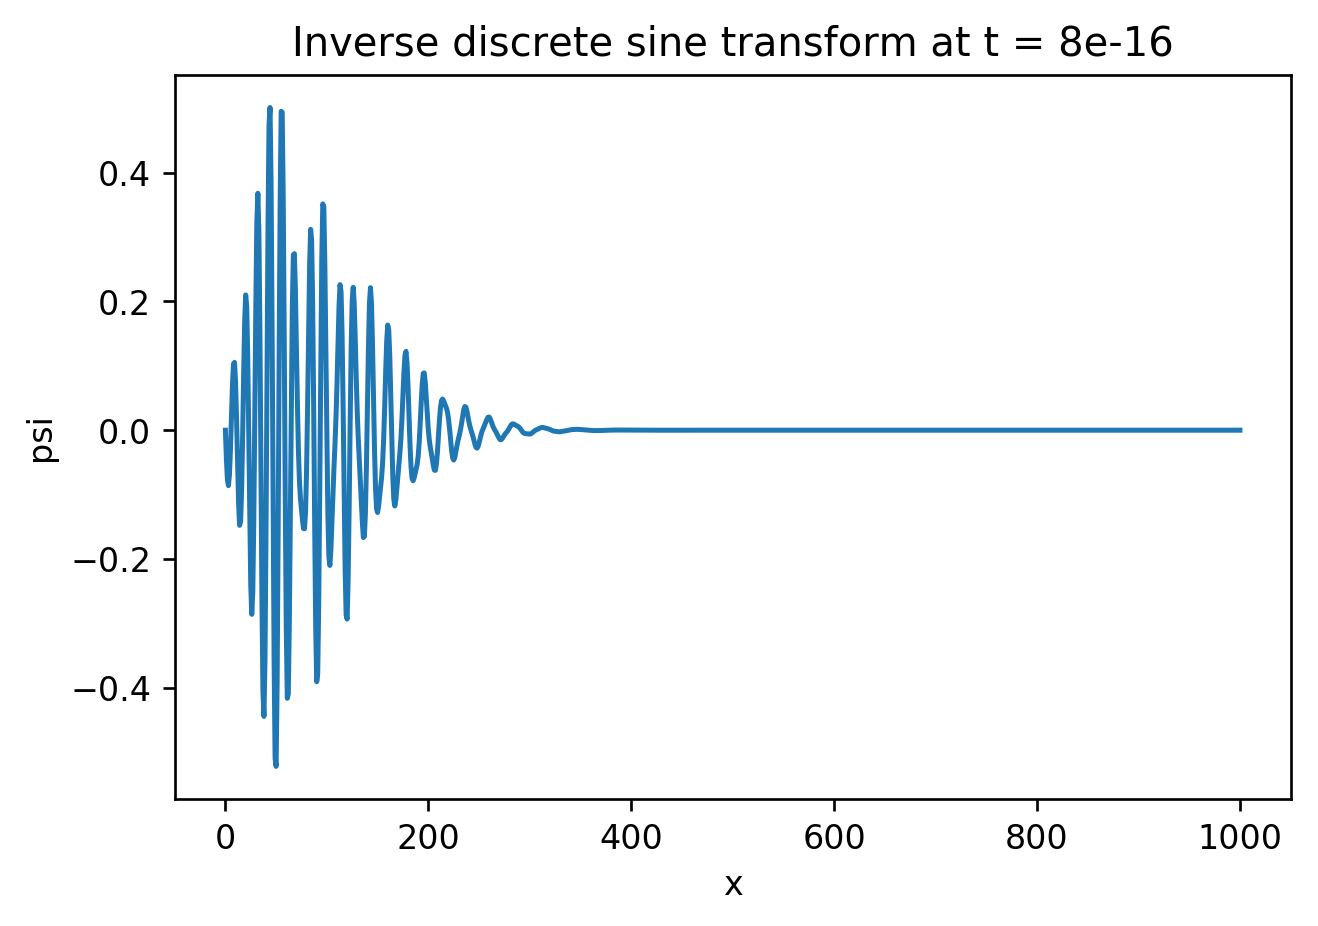

In [148]:
t3 = 8e-16  # seconds 

plot(realpsicoeffs(t3), label = "Real part wavefunction")
    
xlabel("x")
ylabel("psi")
title("Inverse discrete sine transform at t = 8e-16")
show()

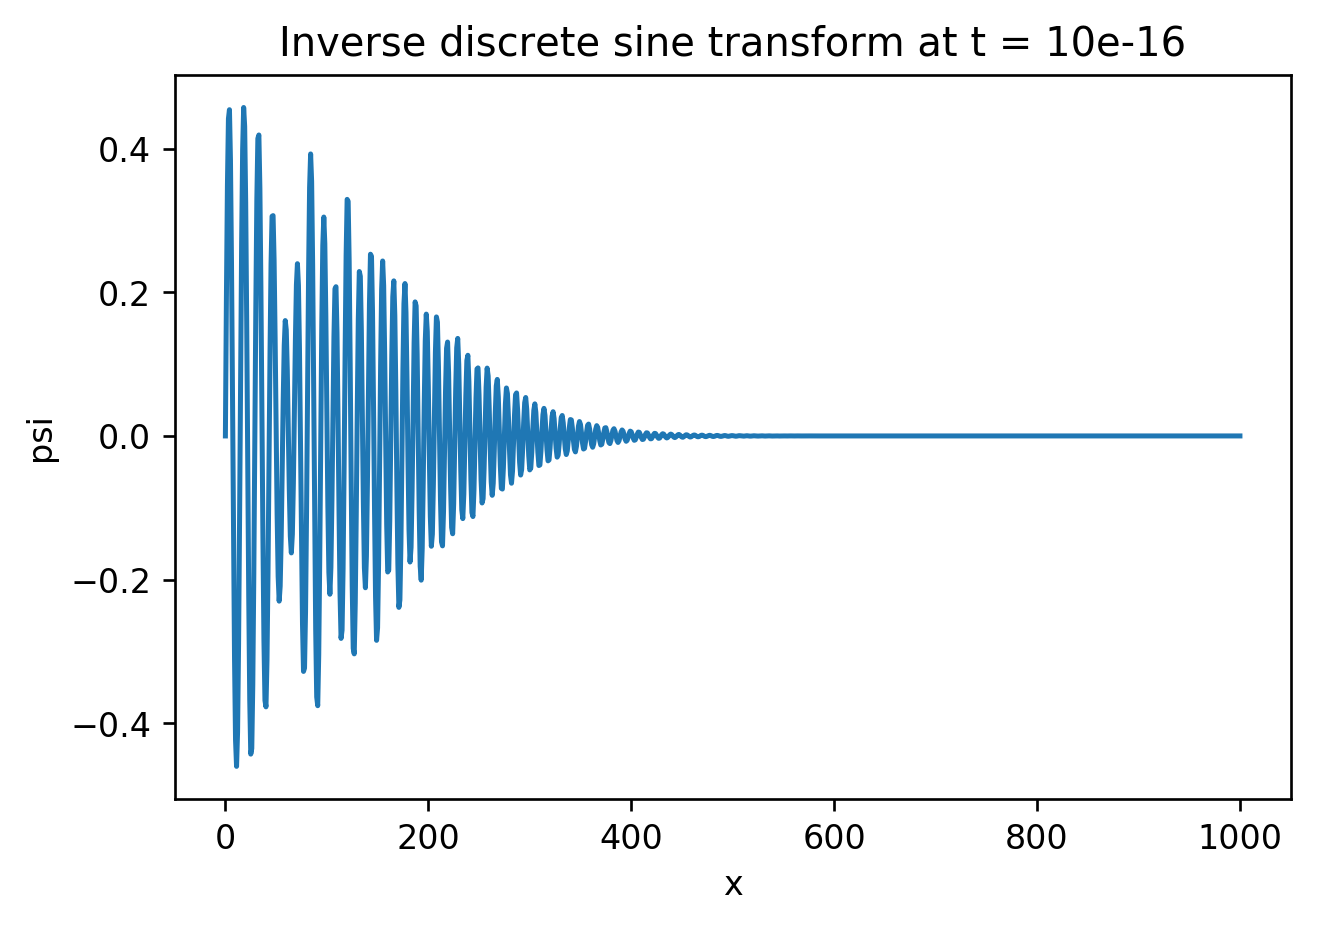

In [149]:
t4 = 10e-16 # seconds 

plot(realpsicoeffs(t4), label = "Real part wavefunction")
    
xlabel("x")
ylabel("psi")
title("Inverse discrete sine transform at t = 10e-16")
show()

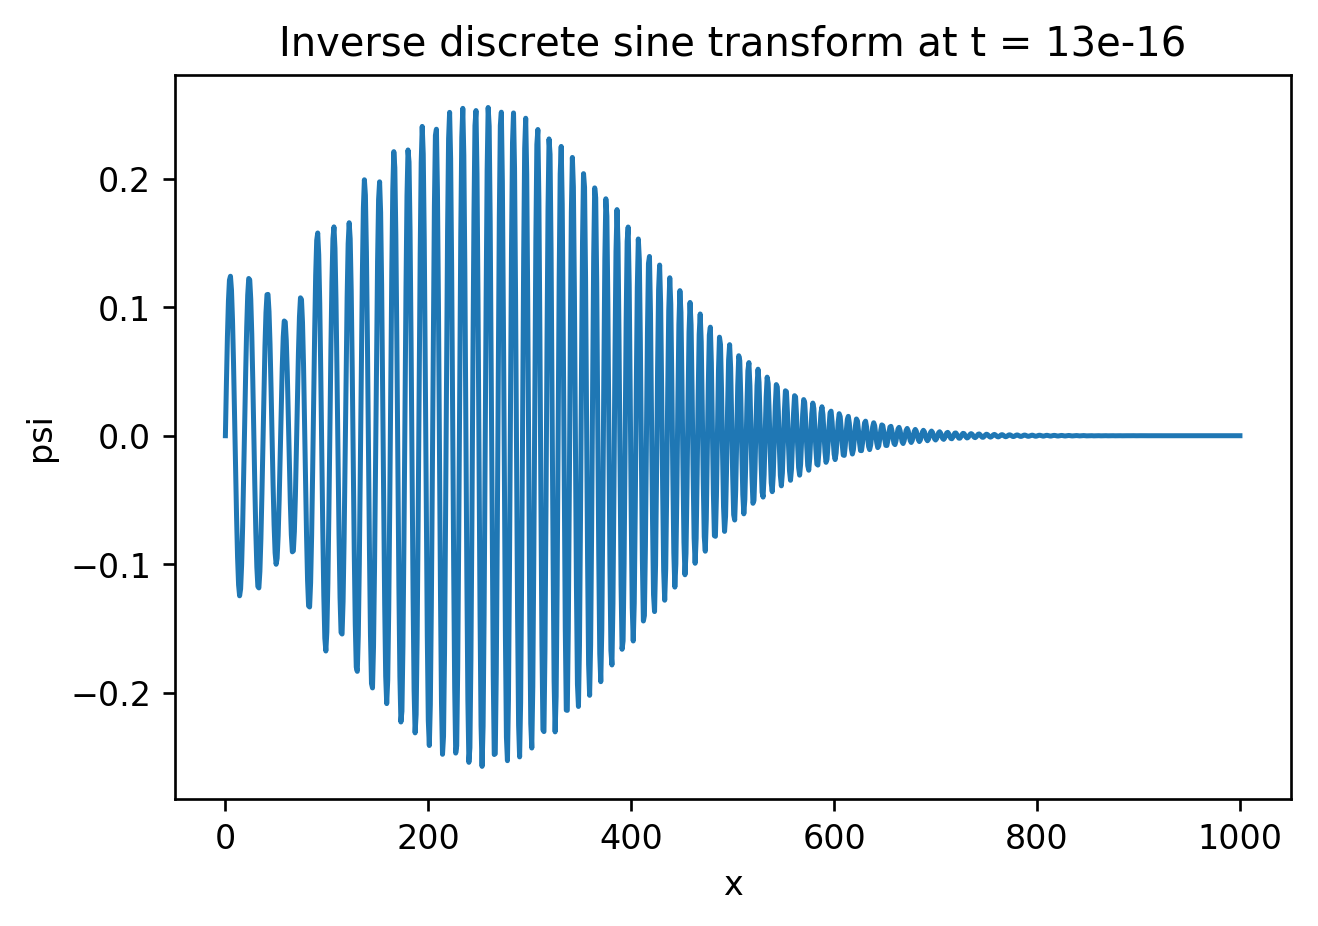

In [150]:
t5 = 13e-16 # seconds 

plot(realpsicoeffs(t5), label = "Real part wavefunction")
    
xlabel("x")
ylabel("psi")
title("Inverse discrete sine transform at t = 13e-16")
show()

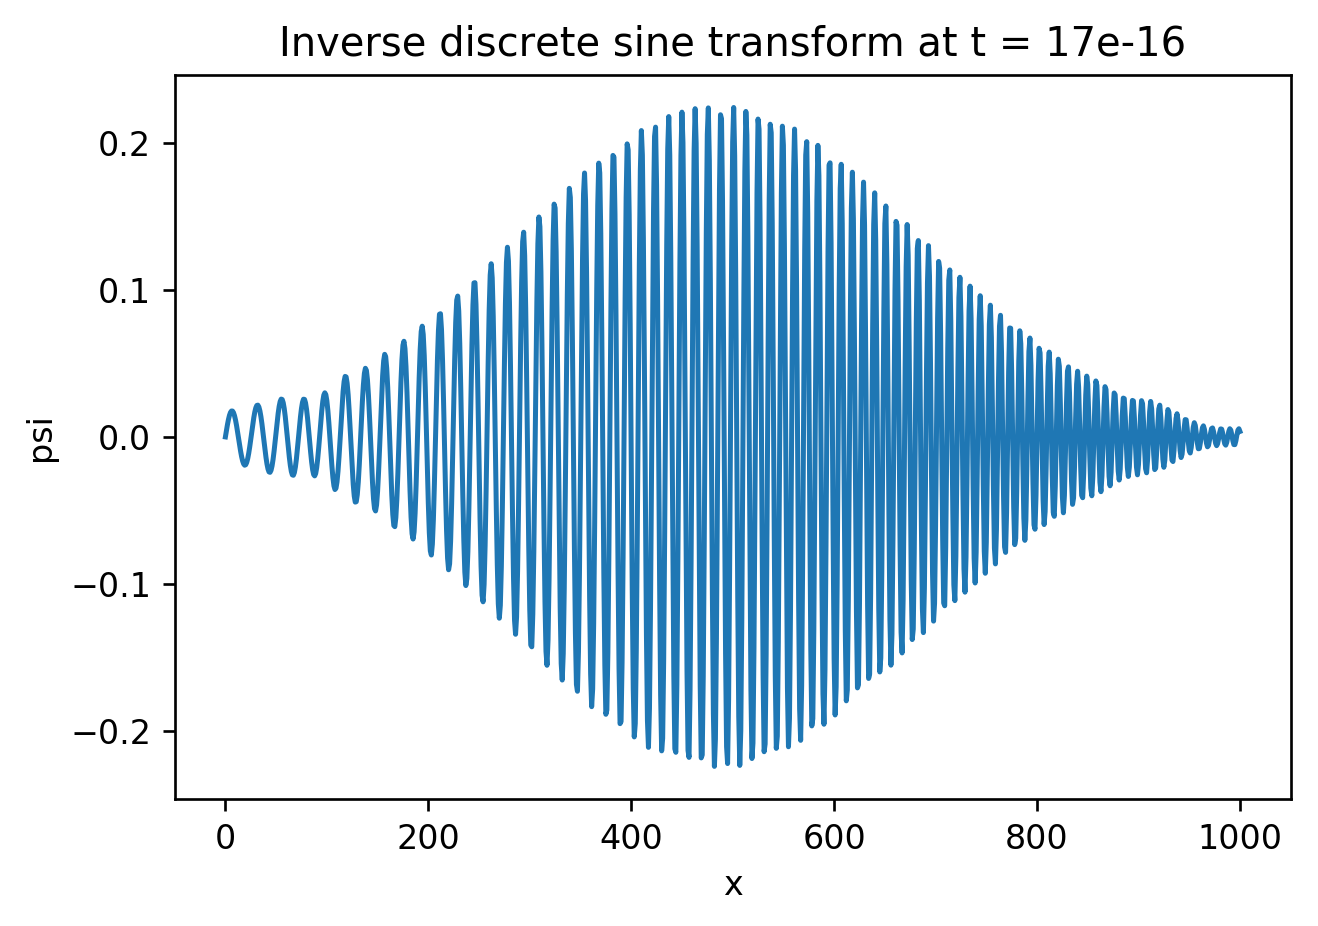

In [151]:
t5 = 17e-16 # seconds 

plot(realpsicoeffs(t5), label = "Real part wavefunction")
    
xlabel("x")
ylabel("psi")
title("Inverse discrete sine transform at t = 17e-16")
show()

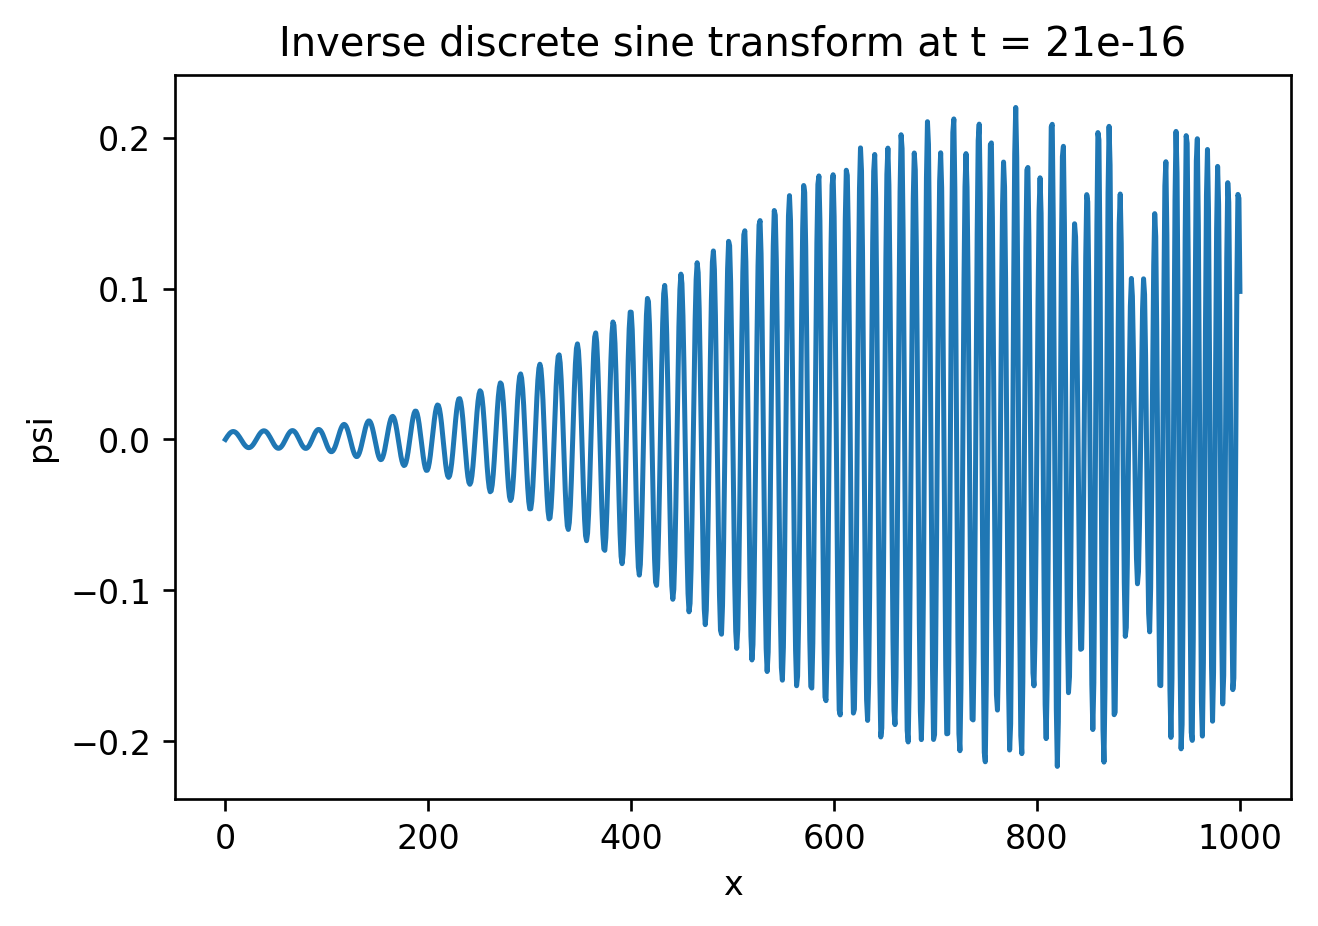

In [152]:
t6 = 21e-16 # seconds 

plot(realpsicoeffs(t6), label = "Real part wavefunction")
    
xlabel("x")
ylabel("psi")
title("Inverse discrete sine transform at t = 21e-16")
show()